# 一次変換と matplotlib

線形写像について、また、複素平面について、
プログラムを通じて勉強しましょう。


行列 A が与えられた時に、$det(A - \lambda I) = 0$ となる $\lambda$ のことを固有値、それぞれの $\lambda$ に対して、
$A \vec x = \lambda \vec x$ となる $\vec x$ のことを固有値 $\lambda$ の固有ベクトルといいます。numpy には、linalg.eig という，固有値と固有ベクトルを返してくれる関数があります。この関数は、(固有値のベクトル, 
固有ベクトルを並べてできた行列(各列が固有ベクトル))というタプルを返します。ですので、2 つの変数のペアで返値を受け取れば，それぞれをとってこれます。

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
a = np.array([[1,0],[-0.5,2]])
e, v = np.linalg.eig(a)
print(e)
print(v)

[2. 1.]
[[0.    0.894]
 [1.    0.447]]


v は，固有ベクトルのリストではなく，v の各列が固有ベクトルだということに注意してください。この場合，固有値は 2 と 1 で，2 の固有ベクトルは [0,1] 1 の固有ベクトルは [0.894, 0.447] です。 

** 練習問題 **
2 次元の場合で、固有値、固有ベクトルを計算するプログラムを自分でも書いてみよう。高次元になると、方程式が高次になるので、ニュートン法などで方程式を解くなどのことを考える必要があります。

固有値，固有ベクトルの意味を考えるために，画像に対する，これらの変換による一次変換を考えてみましょう。

Python では、画像処理に、Pillow (PIL) パッケージが広く使われています。
画像を表示するだけなら、PIL パッケージに属する Image モジュールを用いて、次のようにして簡単にできます。
Image.open により、画像ファイルに対応した Image オブジェクトが作られます。このオブジェクトは、
show メソッドでウィンドウを開いて表示できます。

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=500x500 at 0x11238AA90> <class 'PIL.PngImagePlugin.PngImageFile'>


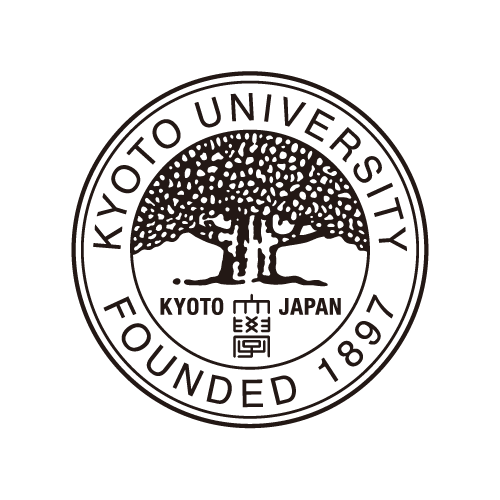

In [11]:
import PIL.Image as Image

im = Image.open("./logo.png")
print(im, type(im))
im

PIL モジュールには、ImageDraw モジュールもあり、Image に対する描画ができます。ImageDraw.Draw 関数で返されるのは、
この画像に対する描画を担当する ImageDraw クラスのオブジェクトで、それに対して line などのメソッドを呼び出すことに
より、描画ができます。line は、第1引数でリストとして座標が与えられた2点を結ぶ線をひくものです。

後の描画をわかりやすくするために，格子線をひいておきます。

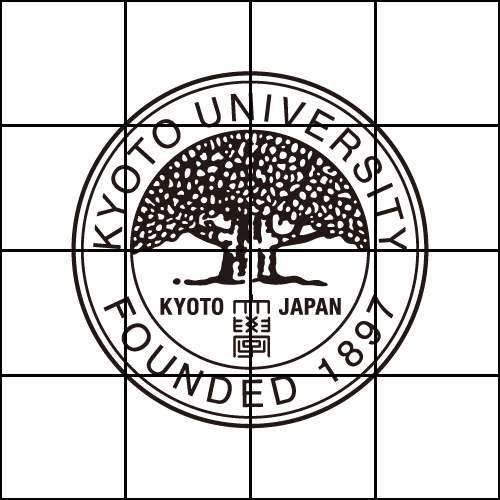

In [32]:
from PIL import Image,ImageDraw

im = Image.open("./logo.png")
draw = ImageDraw.Draw(im)
w, h = im.size  # 500x 500のはず
for i in (list(range(0, 500, 125)) + [499]):  
                # range には + はできないので、list に一旦変換
    draw.line([i,0,i,500],fill="black",width=3)
    draw.line([0,i,500,i],fill="black",width=3)
im

さらに、im を、np.asarray でピクセルの配列に変換し，
matplotlib で表示しましょう。


(500, 500, 4)


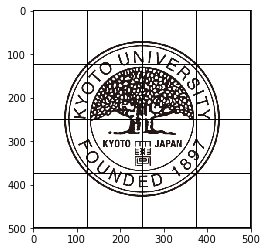

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

imarray = np.asarray(im)

#imarray は，画像のサイズ x 4 の rgba の配列
print(imarray.shape)

plt.imshow(imarray, aspect="equal")
plt.show()

これからの処理のために、x, y の座標が[0,500]x[0,500] ではなく，[-1,1]x[-1,1] 上の画像となるようにしましょう。
もともと白黒画像なので，黒となっている[-1,1]x[-1,1]　の点のリストとして表現しなおしてやります。

imarray の shape を見ればわかるように、imarray は(500,500,4) の3次元配列です。
imarray(x,y,a) は，各点の色の a 成分 (a = 0,1,2,3 は，r(赤), g(緑), b(青), alpha（透明度）) を表しています。
a = 3, すなわち，alpha成分だけとってきた2次元配列を fst としましょう。(他の成分では draw.line で描いた線がうまく出ないようです。)
そして，fst[x,y] が 0 でない点の座標 (x, y) だけを取り出して，それを
[-1,1]x[-1,1] の範囲に座標変換した値 (x, y) のリスト original を作ります。
numpy で操作するには，タプルのリストではなく，x, y 成分を0行目，1行目にもつ２次元配列にする必要があります。
x 成分，y 成分だけの配列 imagex, imagey を作り，それらからなる ndarray である image を作ります。

In [34]:

# 第3成分だけをとってくる。
fst= imarray[:,:,3]

#(x, y) の点が 0 でない（つまり，色がついている）所の座標を [-1, 1]x [-1,1] に変換した座標のリストを作る。
original = [((y-250)/250,((250-x)/250)) for x in range(500) for y in range(500) if fst[x,y] != 0]

#その x　成分，y 成分の配列のペアとなる配列を作る
image = np.array([[x[0] for x in original],
                  [x[1] for x in original]])
image

array([[-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [ 1.   ,  1.   ,  1.   , ..., -0.996, -0.996, -0.996]])

次に定義する showimage は、この image の形式の画像を表示するものです。

matplotlib の scatter は，与えられた座標に点をうつものですが，第1引数，第2引数に，x, y 座標の他に，
x 座標の配列, y 座標の配列をとることもできます。しかし，これらをまとめた配列(すなわち img ) をとることはできません。2 引数をとる関数に，リストや tuple を適用するのに，引数に`*` をつければいいということは以前学びましたが，同じことは，ndarray でもできます。よって，scatter の引数に *image をわたしています。
本質はこの行だけで，あとは座標軸の描画関係なので，無視して大丈夫です。

matplotlib は，最後に plt.show() により描画を行いますが，notebook の場合には，セルの最後に行ってくれます。その方が、showimage の後に行う描画と一緒に一つの画面に行えて便利なので，show なしで利用します。




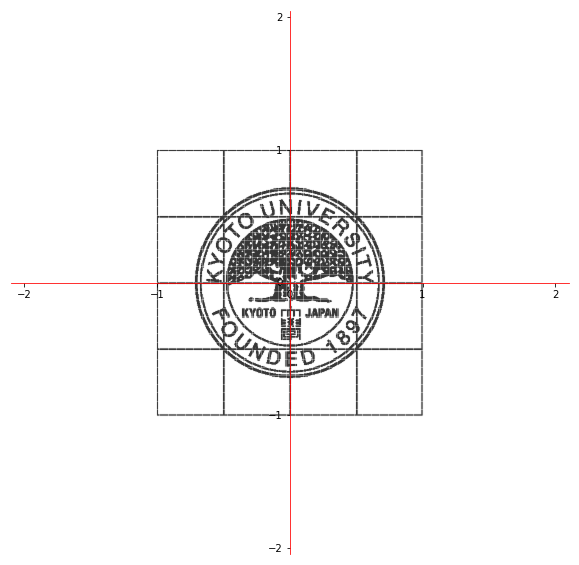

In [35]:
def showimage(image, size=0):
    """ image で与えられた点の集まりを全て plot した図を作る。size は描画する範囲が
    ([-size,size]x[-size,size])になるように指定。"""
    if(size== 0):
        size = int(image.max())+1
    fig, ax = plt.subplots(figsize=(size*5,size*5))
    plt.scatter(*image, s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定(面倒だが、左と下ではなく、座標軸に数を入れるのに、他にいい方法はなさそう)
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks(range(-size, size+1, 1))
    ax.set_yticks(range(-size, size+1, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

  
showimage(image)

image という ndarray には，
元と同じ画像が，[-1,1]x[-1,1] の範囲で作られていることが分かります。さて，image には黒い点の x座標, y 座標の列からなる配列がはいっています。
それに座標変換を行い，絵がどうなるか見てみましょう。
座標変換後の x座標, y 座標の列からなる配列を得るには，変換行列を左からかければいいはずです。

行列 $A = \left(\begin{array}{cc}a& b\\ c& d\end{array}\right)$
による一次変換は，点
$\left(\begin{array}{cc}1\\ 0\end{array}\right)$ を
$\left(\begin{array}{cc}a\\ c\end{array}\right)$ に，点
$\left(\begin{array}{cc}0\\ 1\end{array}\right)$ を
$\left(\begin{array}{cc}b\\ d\end{array}\right)$ に移動させる変換
であることと，線形性を，この図から確認しましょう。

まず，，a は，x 成分を2倍，y 成分はそのままという一次変換行列です。

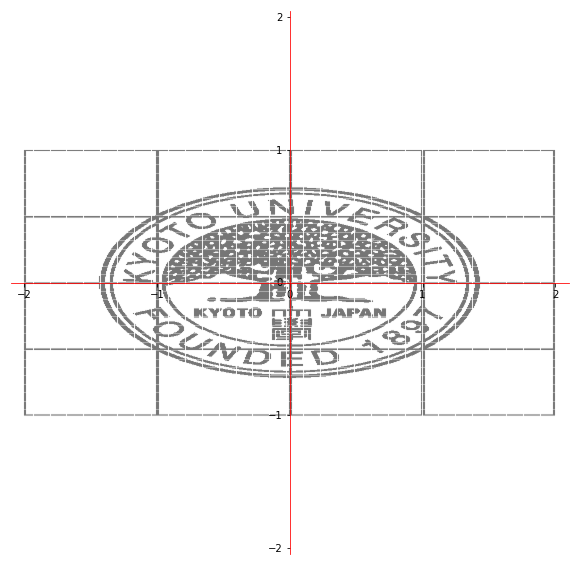

In [36]:
a = np.array([
    [2,0],
    [0,1]])
newfig = a@image
showimage(newfig)


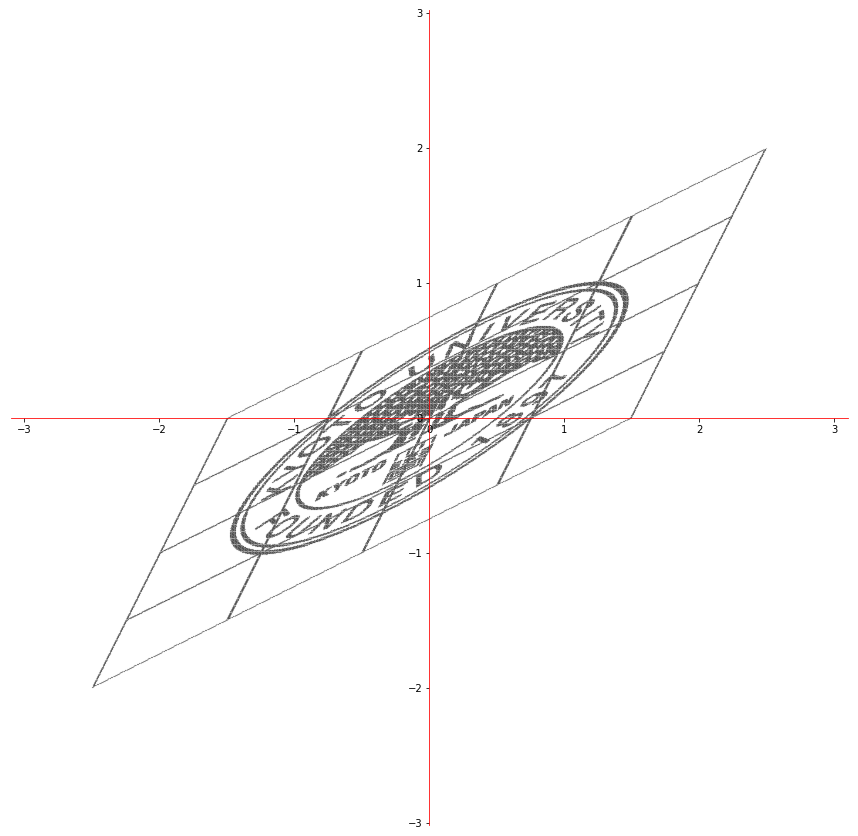

In [37]:
a = np.array([
    [2,0.5],
    [1,1]])
newfig = a@image
showimage(newfig)


**練習問題10** 与えられた t に対して，t だけの回転行列を返すメソッド trans を作ろう。それをかけることにより，image を回転させた絵を作成し，描画しよう。


**練習問題20** 行列 `[[a,b][c,d]]` による一次変換を行うと，(1,0) が (a,c), (0,1) が (b,d) に移ります。
そのことが分かるように，行列 v をもらい，その行列で image を一次変換した画像の上に，(a,c) および (b,d) に，赤および青の点をうった絵を描く，trans(v) を作ろう。
点は，matplotlib　の scatter 関数で打つことができる。また，matplotlib は，show を呼び出さないと、セルにある描画命令をまとめて実行してくれるので，showimage の後に，これを行えばよい。
showimage の第2引数で int の値 size を渡すと，描画範囲を [-size,size]x[-size,size] にできる。v をもとに，適切な値をshowimage にわたして，画像が画面内に収まるようにしよう。


trans を用いて、いろんな行列の一次変換の結果を描画しよう。

**練習問題30** 角度 30 の回転行列

**練習問題35** t = 30 とし、(cos(t), sin(t)) と原点を結ぶ直線に対する折り返し。(-t 度回転し、x 軸で折り返し、t 度すればよい。)
(-2cos(t),-2sin(t)) と (2cos(t), 2sin(t)) を結ぶ線分も描こう。2点 [x0,y0], [x1,y1] を結ぶ青色の線分で幅が3 のものは，

```plt.plot([x0,x1], [y0,y1], 'b-', lw=3) ```

で描くことができる。


**練習問題40**  A = [[1, 0.2],[0.5, 1]], A の 2乗，A の3乗。
行列 a の n 乗は，
```
np.linalg.matrix_power(a, n) 
```
で求まる。

**練習問題50**  A = [[1,0],[-0.5,1]],
A の 2乗，A の 3 乗。　　　

**練習問題60** 
trans を，固有値を表示し，固有値が実数の時には，原点を始点とする固有ベクトルも描画するように変更した，eigen(a) を作成しよう。x が実数かどうかは，type(x) == complex で調べることができる。上の練習問題のそれぞれの行列に対して新しい eigen を行い，固有値と固有ベクトルの意味を確認しよう。


**練習問題70** 
最大の固有値に対応する固有ベクトルが X 軸に来るように、図形を回転させよう。

**練習問題80** (xx, yy) をもらい，xx, yy だけ平行移動を行うにはどうすればよいか考えましょう。
それは，(x, y) の代わりに (x, y, 1) を考えて，　
`[[1,0,xx],[0,1,yy]]` という行列との掛け算をすればよいはずです。画像を表す ndarray figx の長さは，
`figx.shape[0]` でとって来れます。また，[1,1,1...,1] という大きさ n のリストは [1]*n　でできます。

## 複素数

複素数は，平面上の点と１対１に対応します。そして，複素関数
$y = f(x)$ は，平面上の点を点に，図形を図形に移す写像となります。解析的（無限回微分可能）な複素関数が作る変換は，きれいな特徴を持っています。

original は，点を表す (x, y) というペアのリストだったので，次で，対応する複素数の ndarray が作れます。

In [42]:
imagec = np.array([complex(*t) for t in original])

後で割り算をする都合で，0 だけ，消しておきましょう。

In [43]:
print(np.where(imagec == 0))
print(len(imagec))
imagec = np.delete(imagec, np.where(imagec == 0))
print(len(imagec))

(array([32436]),)
52717
52716


それを画面表示するには，次のようにすればいいでしょう。
plt は複素数に対応していないので，実数部分と虚数部分の２つのリストを作ってから scatter に渡しています。

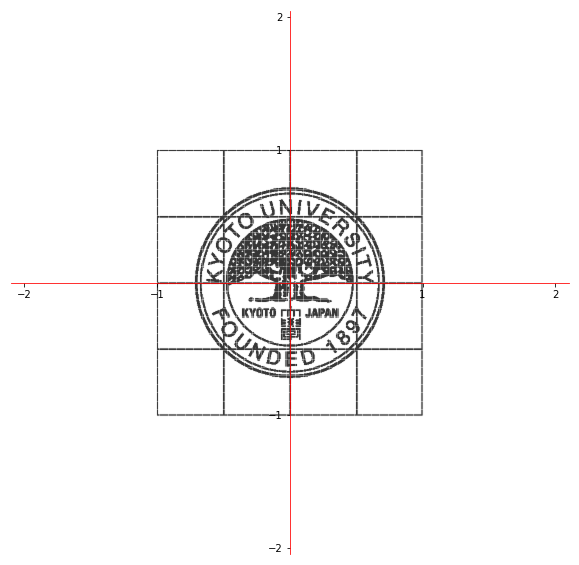

In [44]:
def showcimage(cimage, size=2):
    """ image で与えられた点の集まりを全て plot した図を作る。size は描画する範囲が
    ([-size,size]x[-size,size])になるように指定。"""
    fig, ax = plt.subplots(figsize=(size*5,size*5))
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    plt.scatter([x.real for x in cimage], [x.imag for x in cimage], s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定(面倒だが、左と下ではなく、座標軸に数を入れるのに、他にいい方法はなさそう)
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks([-2,-1,1, 2])
    ax.set_yticks([-2,-1,1, 2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

showcimage(imagec, 2)  


複素数の掛け算は回転と拡大・縮小を表します。

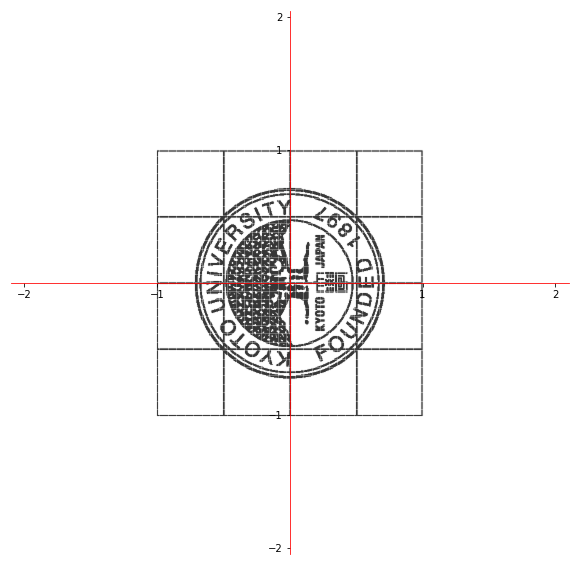

In [45]:
showcimage(imagec*1j)  


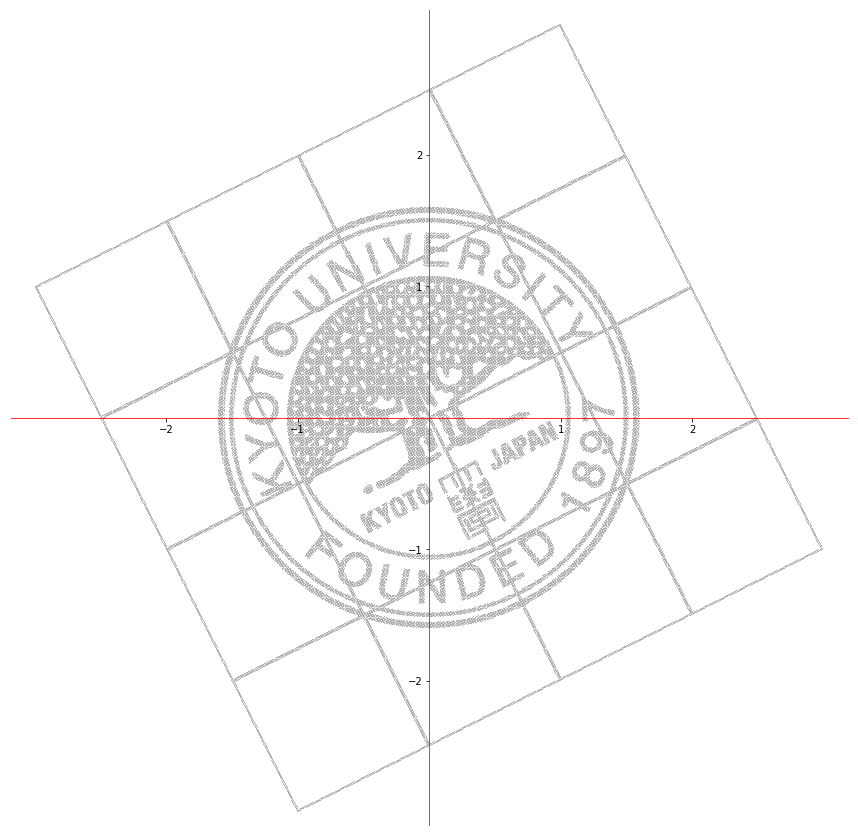

In [46]:
showcimage(imagec*(1j+2),3)  

関数 f(x)=1/x は，単位円に関してひっくり返して，さらに，複素共役をとります。
よって，g(x) = np.conjugate(1/x) により，単位円に関してひっくり返すことになります。
直線でなく，円に対して対象というのは分かりにくいでしょうが，x 軸上で  x と 1/x の関係を考えて，絵を見て直感的に感じてください。

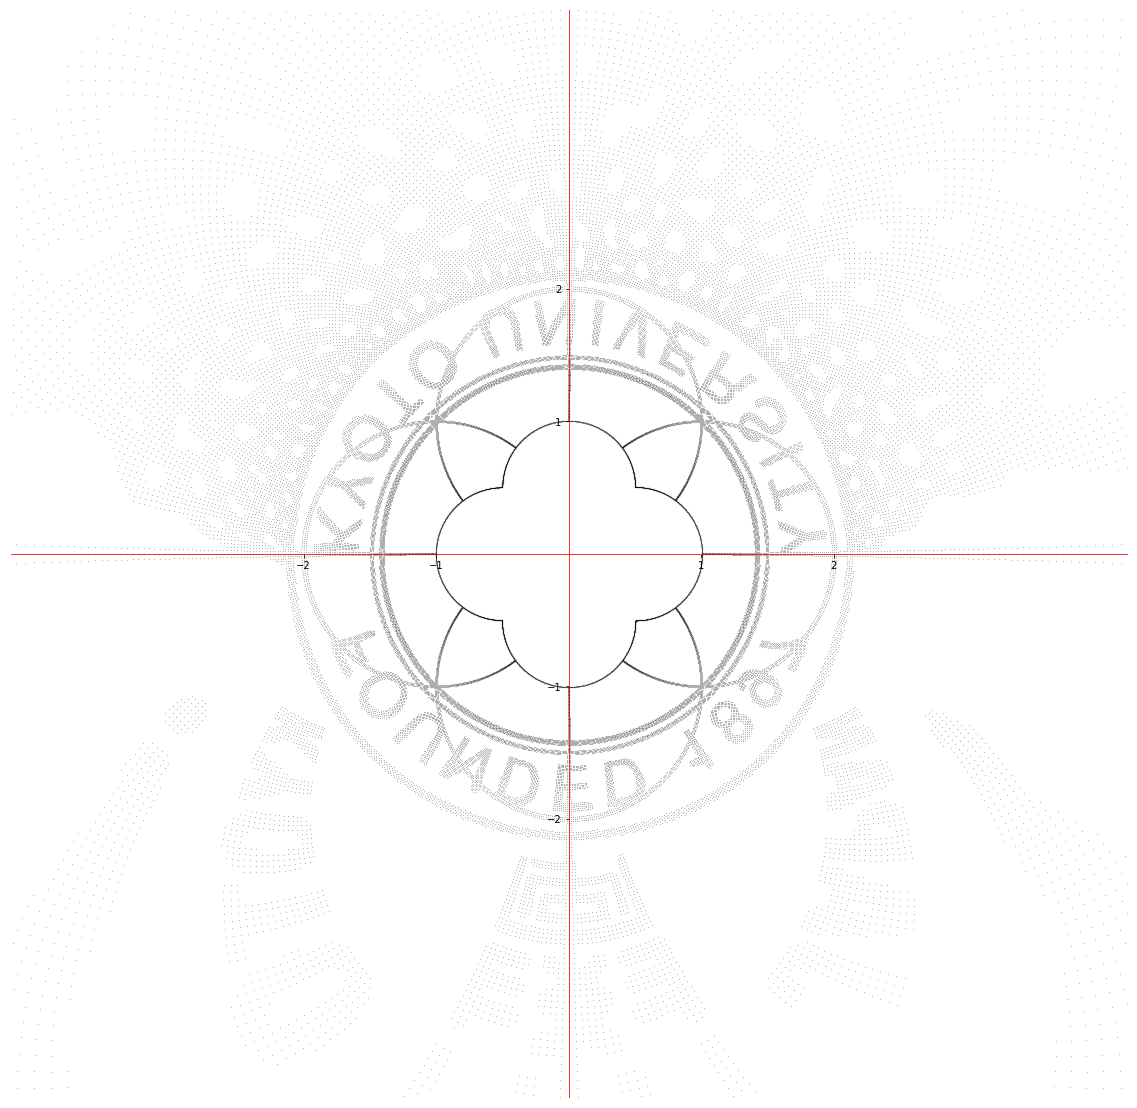

In [49]:

showcimage(np.conjugate(1/imagec), 4)  

#imagec を青で描画
#import math
#plt.scatter([x.real for x in imagec], [x.imag for x in imagec], s=0.01, c="green")  # 0,01 は点のサイズ。

## 単位円を赤で描画
#x = []
#y = []
#for j in np.linspace(0, 2 * np.pi, 1000):
#      x.append(math.sin(j))
#      y.append(math.cos(j))
#plt.plot(x,y, c="red")


元の絵を，複素単位 i だけ下にずらして，x 軸より下だけにして
1/x をとってみましょう。0 で割り算の warning は気にしないでいきましょう。


/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


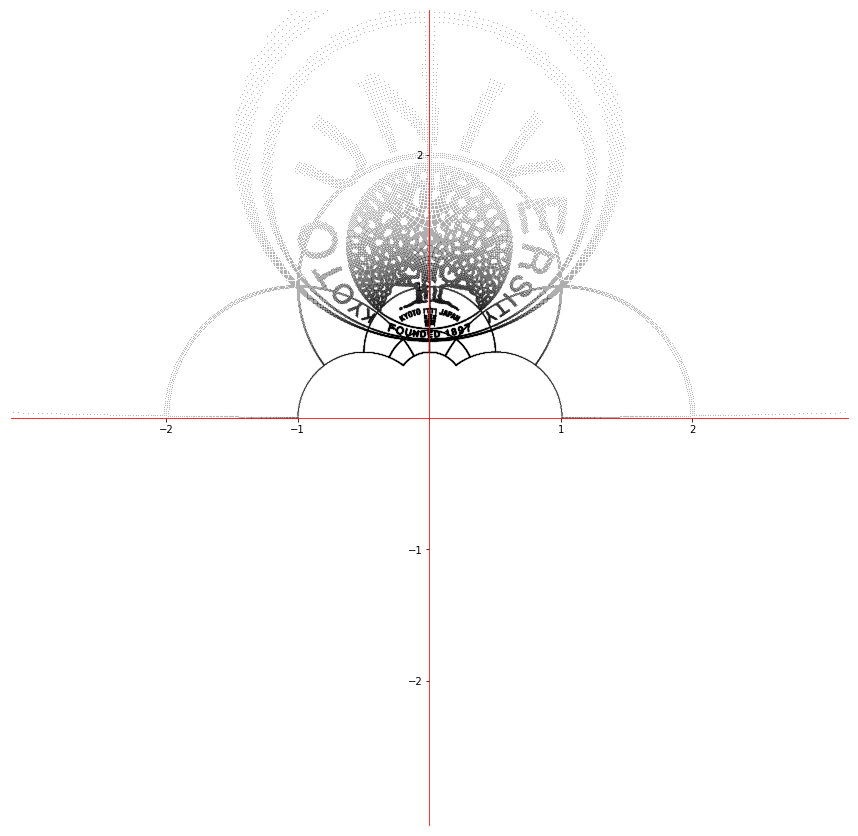

In [50]:
showcimage((1/(-1j+imagec)), 3)  

f(x) = x**2 は，1:2 の写像なので，2重になってしまうので，ちょっと複雑です。

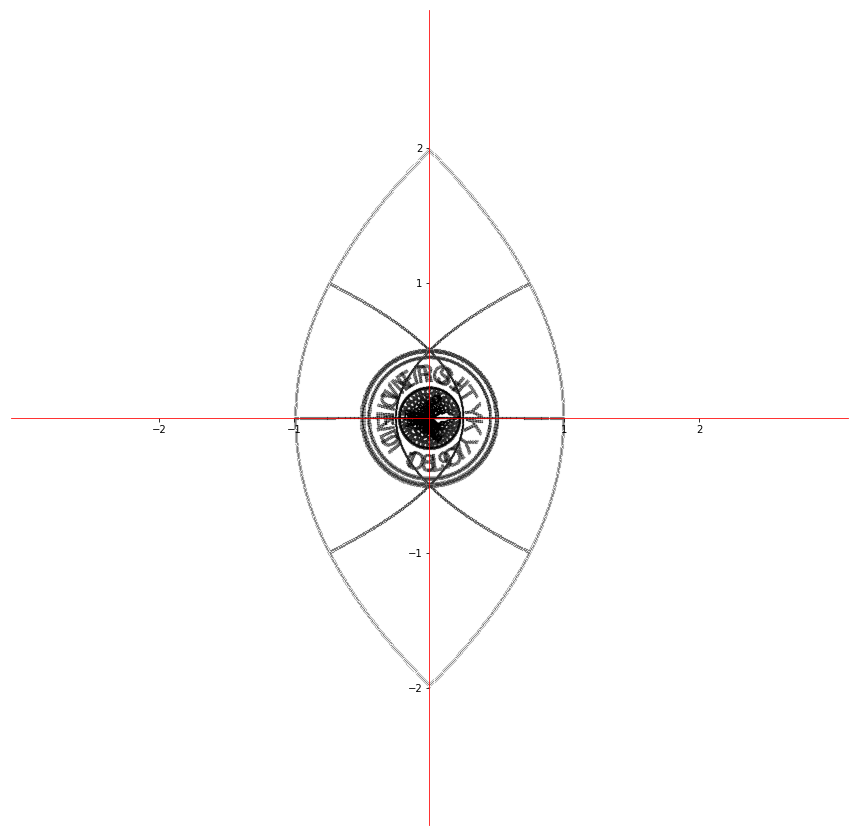

In [51]:
showcimage(imagec ** 2, 3) 

2 重にならないように，1 を足して，元の絵を y 軸の右側だけに
もっていって行いましょう。元の絵を，y 軸が x 軸のマイナス部分にくるように
引き伸ばした絵になっているのがわかりますか？

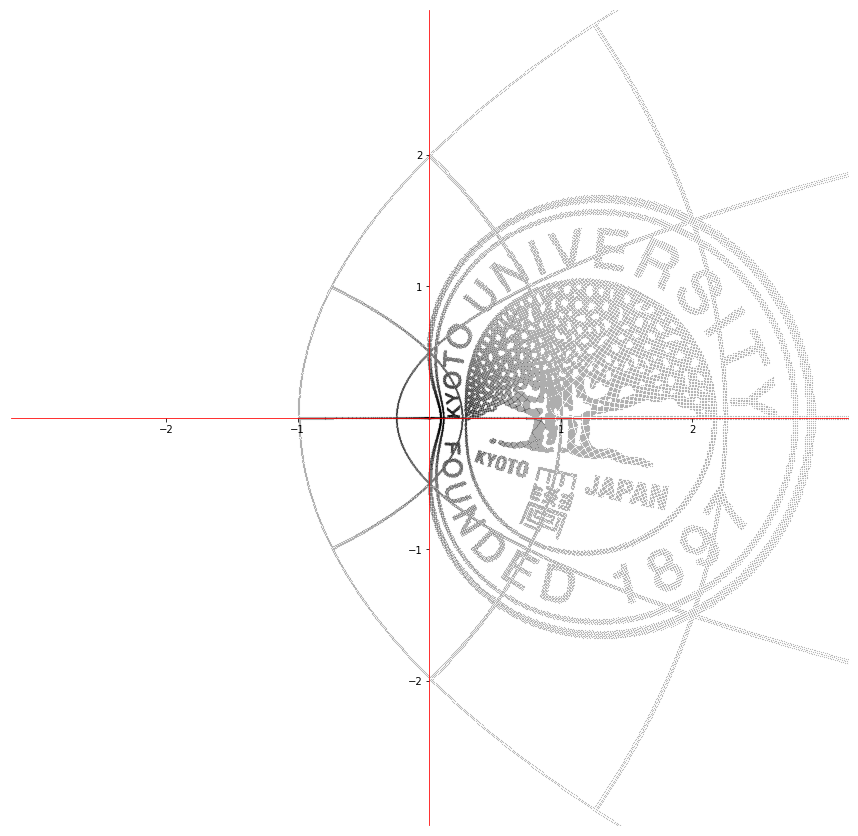

In [52]:
showcimage((1+imagec) ** 2, 3) 

逆の sqrt は，x 軸のマイナス部分で切ってそれが y 軸にくるまで伸ばした感じです。原点周りが薄くなっているように，原点の周りは引き伸ばされています。

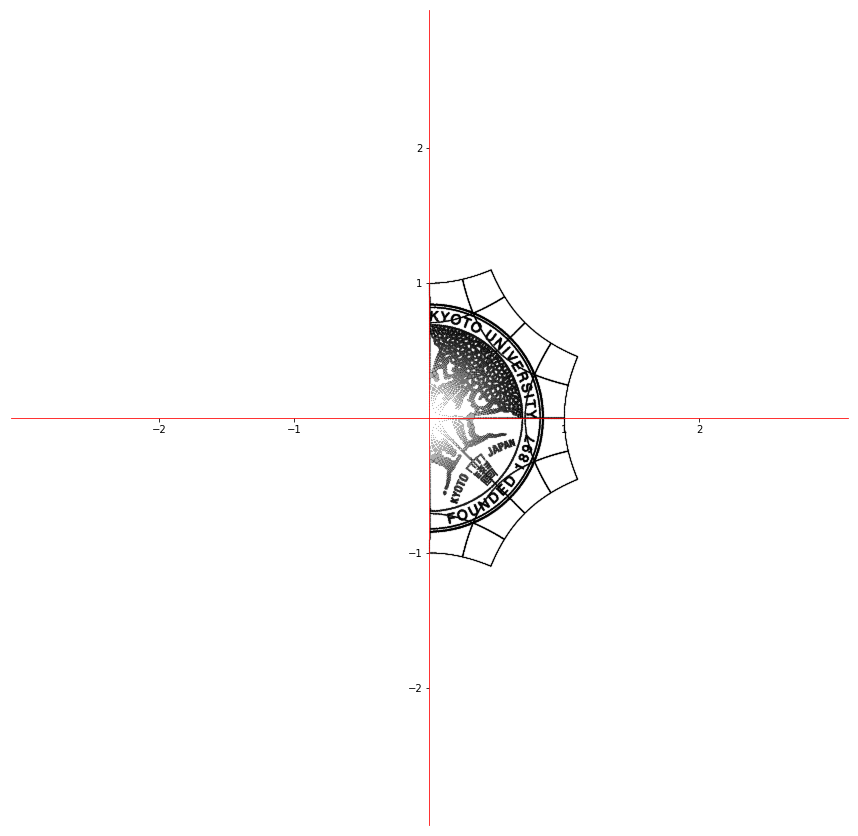

In [53]:
import cmath
showcimage([cmath.sqrt(x) for x in imagec], 3) 

メビウス変換（一次の分数写像）は，複素平面に無限遠点を加えたところ(無限遠をz = 1 の所にしたリーマン球面を考えるとわかりやすいです）で考えると，１対１の写像になっています。次の写像は，
1 が0 に，0 が -1 に，-1 が無限大に，無限大が 1 になっています。つまり，リーマン球面を，y 軸の周りで 90 度回転させています。

/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


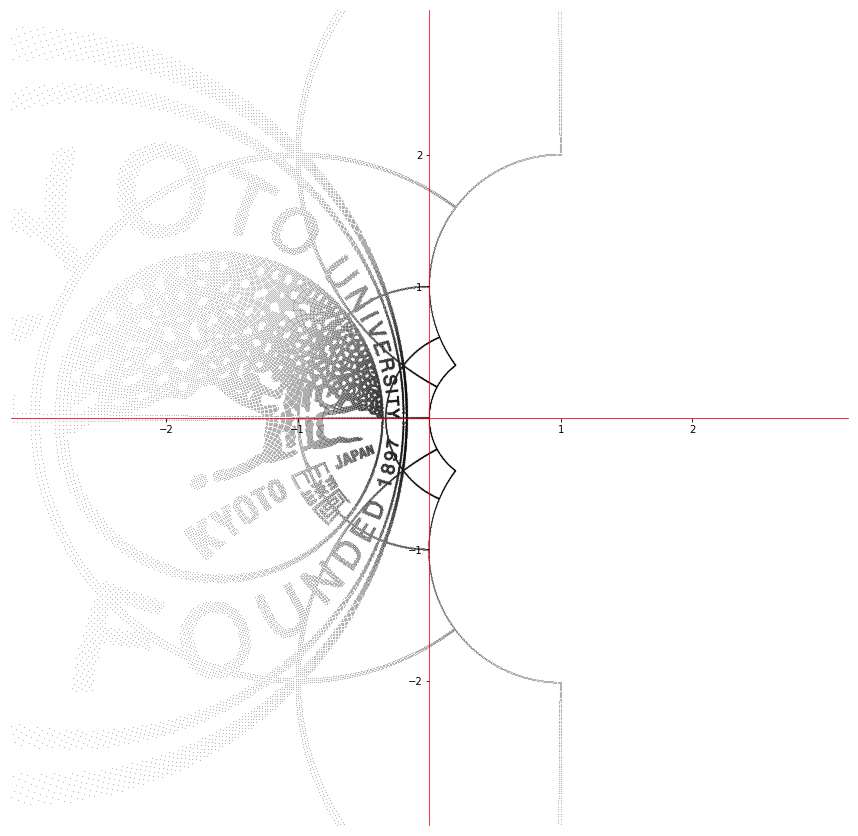

In [58]:
showcimage((imagec-1)/(imagec+1),3) 

$y = e^x$ は次のようになります。

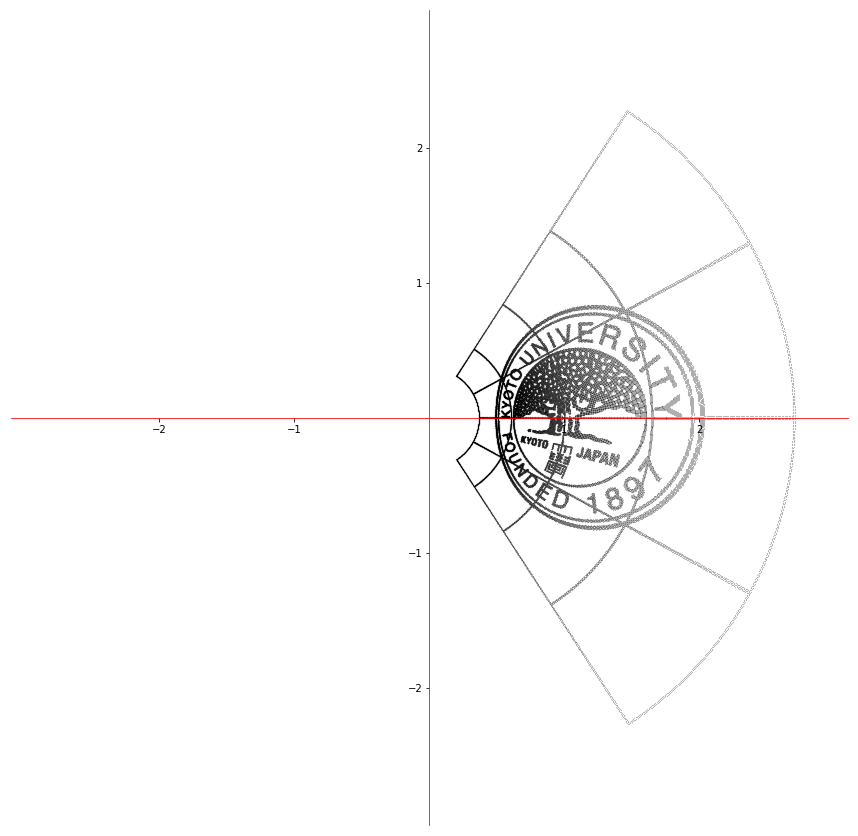

In [59]:
showcimage(np.exp(imagec),3)  

（解析的な）複素関数をかけても，字が自然に読めるのが不思議ではありませんか？これは，変換結果をずっと拡大して，ローカルに見たら，形を変えていないことに由来しています。直交した曲線は，直交した曲線に移ります。

**練習問題** いろんな関数について，図示してみよう。

**練習問題** 今の絵の書き方では，拡大率の大きい所は薄くなってしまいます。拡大率の大きなところも薄くならなくすることも，結果の絵の方からはじめて，それがもともとどの点から来てたか（つまり，逆関数）を考えて描画すればできるはずです。そのように，書き換えてみましょう。

# 最終課題への問題集

## リストの2つの部分へのきれいな分割

[1,2,3,4] というリストは，[1,4] と [2,3] という2つの部分に分けて，それぞれの和を等しくできる。[1,2,3,4,5,6,7,8] というリストを2つの部分に分けて，それぞれの和だけでなく，2乗の和も等しくできるだろうか。

[1,2,3,...,2^(n+1)] を2つの部分に分けて，和，2乗和，..., n 乗和を等しくする方法があるのだが，n = 1,2,3 くらいまではしらみつぶしで調べられても，そこから先は計算機の能力を超える。3 までで法則性を想像して，それが本当に成り立つかどうか，もっと大きな n まで調べよう。コンピュータでどこまで確かめられるだろうか。

解説：この分割法は，Thue-Morse 列と呼ばれているものである。
Thue-Morse 列がこの性質を満たすことの証明を自分で行うか，net の上で探そう。
Thue-Morse 列の性質はいろんな性質をもっている。n が小さい時に確認したり，自分で証明したりしよう。

## タイリング

$2 \times 2$ の正方形から1つ小さな正方形を除いた，大きさ3のブロックを考える。
このブロックを$2^n \times 2^n$ の正方形にひき詰めようとしても，無理である。（なぜか？）

$2^n \times 2^n$ の正方形から 1 つ任意の単位正方形を除いた，$2^n \times 2^n - 1$  の
大きさの領域なら，数だけをみたら，敷き詰められる可能性がある。（なぜか？）

実際に，任意の n >1 において，また，任意の1つの単位正方形の選び方において，敷き詰めが可能である。
そのことは，次のようにして数学的帰納法で証明できる。まず，n = 2 では可能である。
n で可能な時，$2^{n+1} \times 2^{n+1}$ の正方形から1つの単位正方形を除いた図形が
与えられたとする。これを，4 つの$2^n \times 2^n$ の正方形成分の集まりと見た時，その一つだけに，
一つの単位正方形がぬけている。このぬけている成分のところに欠けた部分がくるように，ど真ん中に一つブロックを
を配置する。すると，4つの$2^n \times 2^n$成分は，それぞれが1つづつぬけた状態になる。よって，
帰納法の仮定により，これらはブロックで敷き詰められる。このようにして，全体がブロックで敷き詰められる。

さて，この証明に従った形で，ブロックの敷き詰めを行おう。敷き詰めには，int の ndarray を用いて，
抜けた部分は -1 で，各ブロックは同じ数を用いて表そう。例えば，次は一つの敷き詰めである。0 は，まだ置かれていないことを表すのにとっておこう。


**練習問題** 上の問題で，1つは敷き詰めがあることが分かったが，それぞれの n と単位ブロックの位置に対して，何種類の敷き詰めがあるだろうか。再帰的な手続きは，このようなしらみつぶし的な探索に有効である。数え上げの方法を考えよう。

# ロジスティック・マップのカオス

$0 \leq a \leq 4 $ の a を固定して，
関数 $f_a(x) = a x (1-x)$ を考える。
この関数を繰り返し適用した時の点の挙動について，最初の方の演習で調べ，a の値によって，全く異なる挙動をすることが分かった。ある a については，無限に繰り返すと 1 点に収束していくし，ある a では，２ つの値を繰り返しとる，他の a では，とてもランダムな挙動をした。極限での挙動は，x = 0.5 から始めて，$f_a$ を繰り返し適用し，
最初しばらくの値は捨てて，そこからしばらくの値をぷろっとしてやれば，近似的に図示できそうだ。 a を横軸にして，それぞれの a での挙動を縦軸にとって，図示してみよう。

その一部をズームできる機能もつけてみよう。

# 複素力学系のマンデルブロー集合とジュリア集合

複素関数による力学系を考えよう。

$f_c(x) = x^2 + c$ という写像を考えよう。
これを，x = 0 に対して繰り返し適用した時に，点列が無限遠に発散しないで，有限の値をとるような複素数 c の集まりをマンデルブロー集合という。マンデルブロー集合を描画してみよう。

また，各 c に対し，$f_c$を繰り返し適用しても無限遠に発散しないような点のあつまりを，充填ジュリア集合という。
各複素数 c に対し，充填ジュリア集合を描画してみよう。
マンデルブロー集合の中の各点 c をマウスでクリックして
指定したら，その c に対する充填ジュリア集合を描画するようにしてみよう。

マウスのクリックをとるには，グラフィカルなユーザインターフェース(GUI) を作るライブラリ（例えば，tkinter）が必要である。

## 公開鍵暗号系

公開鍵暗号の標準的な方法である，RSA 暗号は，フェルマーの小定理という数論の定理を用いて作られている。RSA 暗号について勉強し，暗号化，復号化のプログラムを組んでみよう。

##  様々なライブラリの利用

データ処理に用いる pandas

数値計算ではなく，数式的な計算を行う sympy

機械学習に用いる scikitlearn, tensorflow/keras, chainer

など，python には，多くの興味深いライブラリが揃っている。こういったライブラリを利用した課題を自分で定めよう。




